# **Simulação de Evento de Microlentes Gravitacionais**
* PET - Física
* Petianos: Ylana Karolina Santos Lopes
* Data: 27 de dezembro de 2024

O objetivo desse `notebook` é discutir um pouco sobre as microlentes gravitacionais através de uma simulação de um evento com lentes iguais de mesma massa e produzir uma curva de luz artificial da mesma. Ao longo do texto, trataremos um pouco da teoria por trás das microlentes, mas sem adentrar em relatividade geral, de forma que não é necessário conhecimento prévio no assunto. Grande parte do `notebook` é baseado na dissertação de mestrado L. Almeida **[1]**. Com isso, o `notebook` será organizado da seguinte forma:

1. *Introdução*;
2. *Teoria das Microlentes*;
3. *Distribuição de Arquimendes*;
4. *Simulação*;
5. *Conclusão.*

## Importando biblioteca

In [2]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [21]:
%load_ext version_information
%version_information matplotlib, numpy

Software versions
Python 3.12.2 64bit [GCC 12.3.0]
IPython 8.25.0
OS Linux 6.8.0 45 generic x86_64 with glibc2.35
matplotlib 3.8.4
numpy 1.26.4
Wed Oct 02 19:27:10 2024 -03

## **Introdução** 

As lentes gravitacionais são uma consequência observável da Relatividade Geral. Em poucas palavras, a massa de um objeto curva o espaço-tempo, fazendo com que a luz siga essa curvatura e sofra deflexão. Ou seja, o próprio espaço age como uma lente, desviando a luz de uma fonte original e formando a imagem em um ponto diferente da sua posição real. Existem três tipos de lentes gravitacionais: fortes, fracas e microlentes. Neste trabalho, exploraremos principalmente as microlentes gravitacionais como método de detecção de exoplanetas.

A primeira observação de uma lente gravitacional ocorreu em Sobral, no Ceará, durante o eclipse solar de 1919, confirmando as previsões da Relatividade Geral. Apesar de Albert Einstein inicialmente duvidar que fosse possível observar esse fenômeno diretamente, aqui estamos. As microlentes, em particular, diferem dos outros tipos de lentes por não formarem imagens nítidas na resolução típica dos telescópios. Em vez disso, observa-se uma magnificação da luz que chega ao observador durante o evento. Os fenômenos de microlentes acontecem tanto em larga escala, envolvendo galáxias e quasares, quanto em escalas estelares, sendo usados principalmente para detectar exoplanetas.

Por si só, o método das microlentes é relativamente ineficiente para detectar exoplanetas. Além da dificuldade de prever um evento, é necessária uma monitoração cuidadosa ao longo de todo o fenômeno, exigindo cooperação internacional para reunir pontos fotométricos suficientes para identificar a possível existência de um planeta. No entanto, o que motiva os pesquisadores a persistirem nessa técnica é sua independência em relação à estrela do sistema planetário que está sendo analisado. Essa independência é essencial para obtermos uma amostra da demografia planetária sem os *bias observacionais* (favorecimento causado pelo método de observação). Como discutiremos mais adiante, o sistema planetário funciona como um sistema de duas lentes, e, portanto, o que indica sua existência é a própria curvatura do espaço-tempo, não a luz da estrela orbitada pelo alvo. Assim, a maior barreira que enfrentamos são os próprios instrumentos, que apresentam uma razão Sinal/Ruído (SNR) baixa, o que pode dificultar a detecção de planetas menores que a Terra.

## **Teoria das microlentes**

$$
\Delta \varphi = \frac{4GM}{c^2 R} 
$$

$$
R_S = \frac{2GM}{c^2}
$$

$$
\alpha = \frac{2R_S}{r_E}
$$




$$
\mathbf{z}_f = \mathbf{z}_i - \sum_{j=1}^{n} \epsilon_j \left| \mathbf{z}_i - \mathbf{r}_j \right|^2 (\mathbf{z}_i - \mathbf{r}_j)
$$


In [3]:
# Aqui é só uma função para formatar as figuras e o código ficar menos poluído.
def format():
    plt.figure(figsize=(6,6))
    plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
    return
    

In [4]:
def arquimedes(num_points):
    
    golden_angle = np.pi * (3 - np.sqrt(5))
    
    theta = golden_angle * np.arange(num_points)
    
    r = np.sqrt(theta)
    
    x = r * np.cos(theta)/(num_points/1000)
    y = r * np.sin(theta)/(num_points/1000)

    return x, y

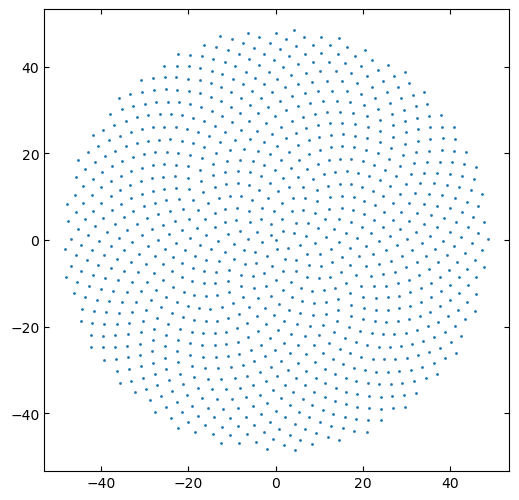

In [5]:
format()
x, y = arquimedes(1000)
plt.scatter(x,y, s = 1)

In [6]:
class Body:
    def __init__(self, massa_frac, position):
        self.massa_frac = massa_frac
        self.position = np.array(position, dtype='float64')


In [7]:

def cart(zix, ziy, body1, body2):
    e1 = body1.massa_frac     #=> fração da massa 
    r1x = body1.position[0]    #=> posição da lente j em relação a origem
    r1y = body1.position[1] 
    e2 = body2.massa_frac      #=> fração da massa 
    r2x = body2.position[0]
    r2y = body2.position[1]


    zfx = zix - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(zix - r1x) - (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(zix - r2x)
    zfy = ziy - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(ziy - r1y)- (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(ziy - r2y)
    return zfx, zfy

In [60]:
## define 2 bodies 

corpo_1 = Body(0.5, [-0.75, 0])
corpo_2 = Body(0.5, [0.75, 0])

zix, ziy = arquimedes(500000)

x1, y1 = cart(zix, ziy, corpo_1, corpo_2)

(-2.0, 2.0)

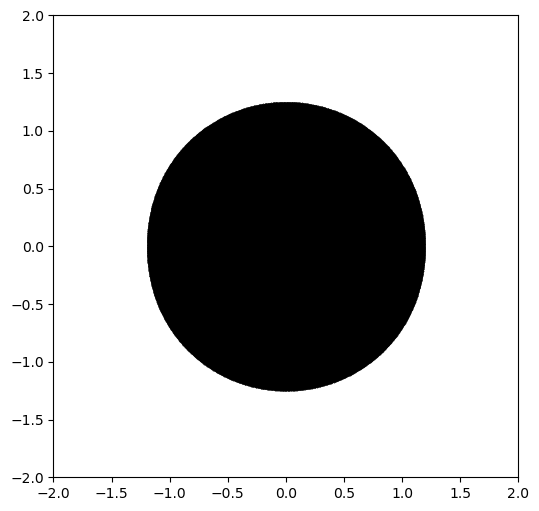

In [61]:

plt.figure(figsize=(6, 6))
plt.scatter(x1, y1, s = 0.1, c = 'black')
plt.xlim(-2,2)
plt.ylim(-2,2)

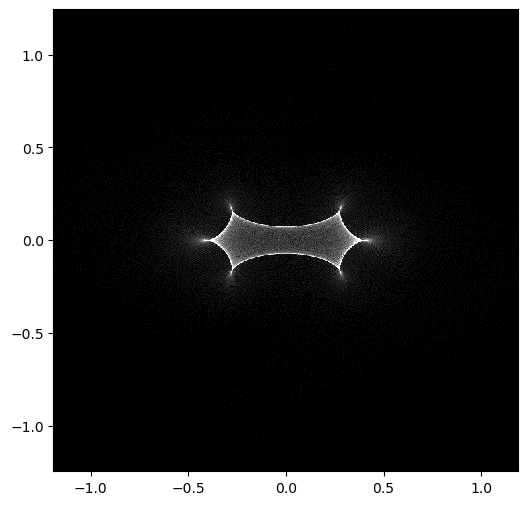

In [70]:
plt.figure(figsize=(6, 6))
plt.hist2d(x1, y1, bins = 700,  cmap ="binary_r", vmin=1, vmax=20)
plt.show()


In [71]:
grid_size = 0.01
x_edges = np.arange(-1.5, 1.5, grid_size)
y_edges = np.arange(-1.5, 1.5, grid_size)

hist, xedges, yedges = np.histogram2d(x1, y1, bins=[x_edges, y_edges])

bin_width = x_edges[1] - x_edges[0]
bin_height = y_edges[1] - y_edges[0]

In [78]:
passo = 700
alpha = 0.8
inter = 0
b = inter/np.cos(alpha)

xp = np.linspace(-1.5, 1.5, passo)
yp = np.tan(alpha)*xp + b

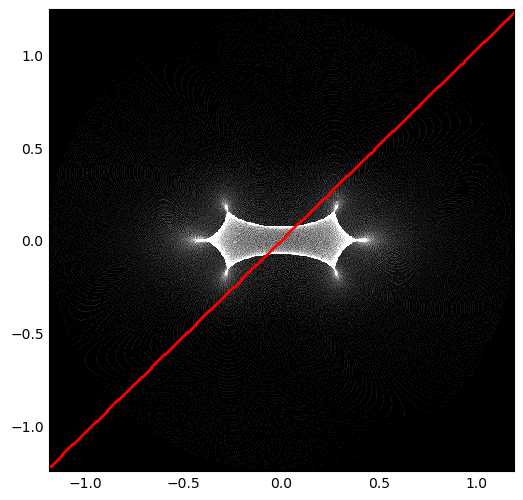

In [ ]:
format()
plt.hist2d(x1, y1, bins = 700,  cmap ="binary_r", vmin=1, vmax=14)
plt.scatter(xp, yp, s = 1, c = 'red')
# plt.xlim(-1., 1.)
# plt.ylim(-1.,1.)


In [81]:
density = []

for i in range(0,passo):
    point_x = xp[i]
    point_y = yp[i]

    x_bin = np.digitize(point_x, x_edges) - 1
    y_bin = np.digitize(point_y, y_edges) - 1

    x_bin = min(max(x_bin, 0), hist.shape[0] - 1)
    y_bin = min(max(y_bin, 0), hist.shape[1] - 1)

    num_points_in_bin = hist[x_bin, y_bin]

    density_1 = num_points_in_bin / (bin_width * bin_height)
    density.append(density_1)

Text(0.5, 0, 'x')

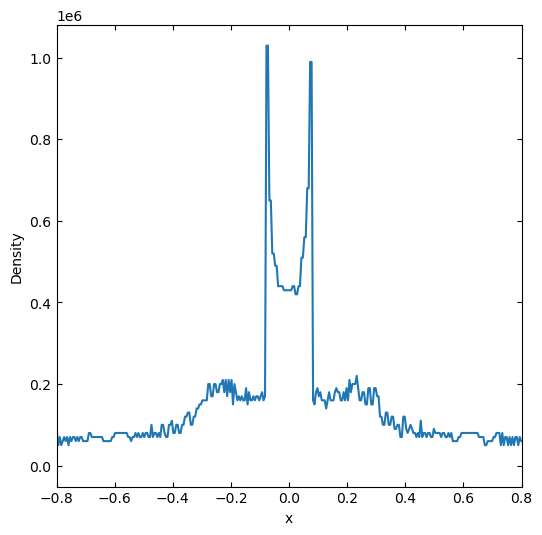

In [82]:
format()
plt.plot(xp, density)
plt.ylabel("Count")
plt.xlim(-.80, .80)
plt.xlabel("x")

In [83]:
# Define a moving average kernel
window_size = 5
kernel = np.ones(window_size) / window_size

# Perform convolution to smooth the data
density_smooth = np.convolve(density, kernel, mode='same')

Text(0.5, 0, 'x')

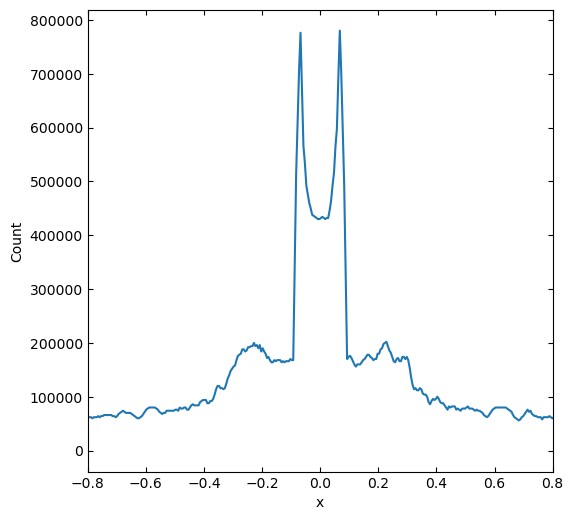

In [84]:
format()
plt.plot(xp, density_smooth)
plt.ylabel("Count")
plt.xlim(-.80, .80)
plt.xlabel("x")

## Referências

[1] Almeida, L., 2017. Estudo da topologia de microlentes gravitacionais e a descoberta de exoplanetas do tipo Terra na zona habitável. 

[2] Vogel, H., 1978. A better way to construct the sunflower head. Mathematical Biosciences, 44(3):179 - 189.